# Machine Learning Model of QSAR Biodegradation dataset

Done by:
- Ng Jack Lung 


## 1) Data Collection
<p style = "font-family: Times New Roman">Importing standard modules.</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignore warning to imporve readability
pd.set_option("display.max_columns", 300) #make every column visible

<p style = "font-family: Times New Roman">The dataset was obtained from UCI Machine Learning Repository:</p>

https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation

In [2]:
biodeg = pd.read_csv('Datasets/biodeg.csv', sep=';')

In [3]:
biodeg.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental_class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [4]:
biodeg.shape

(1055, 42)

<p style = "font-family: Times New Roman">We can see that there are total 41 features and 1 target class named 'experimental_class' in this dataset. Also, there are 1055 instances.</p>

## 2) Data Cleaning
<p style = "font-family: Times New Roman">Making sure the dataset is valid for machine learning.</p>

In [5]:
biodeg.dtypes

SpMax_L               float64
J_Dz(e)               float64
nHM                     int64
F01[N-N]                int64
F04[C-N]                int64
NssssC                  int64
nCb-                    int64
C%                    float64
nCp                     int64
nO                      int64
F03[C-N]                int64
SdssC                 float64
HyWi_B(m)             float64
LOC                   float64
SM6_L                 float64
F03[C-O]                int64
Me                    float64
Mi                    float64
nN-N                    int64
nArNO2                  int64
nCRX3                   int64
SpPosA_B(p)           float64
nCIR                    int64
B01[C-Br]               int64
B03[C-Cl]               int64
N-073                   int64
SpMax_A               float64
Psi_i_1d              float64
B04[C-Br]               int64
SdO                   float64
TI2_L                 float64
nCrt                    int64
C-026                   int64
F02[C-N]  

<p style = "font-family: Times New Roman">As we can see, all the attribute columns are numerical data except our target column.</p>

In [6]:
pd.unique(biodeg.experimental_class)

array(['RB', 'NRB'], dtype=object)

## 2.1 Replacing object/string classes with numbers
<p style = "font-family: Times New Roman">Since our target is in string, we will replace NRB(which stands for not ready biodegradable) into 0 whilst replacing RB(ready biodegradable) into 1. For easier understanding purpose we will replace our target column's name too.</p>

In [7]:
biodeg['experimental_class'].replace('NRB', 0, inplace=True)
biodeg['experimental_class'].replace('RB', 1, inplace=True)
biodeg.rename(columns = {"experimental_class": "ready_degradable"}, inplace = True)
biodeg.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,ready_degradable
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


In [8]:
pd.unique(biodeg.ready_degradable)

array([1, 0], dtype=int64)

## 2.2 Checking Missing Values

<p style = "font-family: Times New Roman">Let's see whether this dataset having any missing values or not.</p>

In [9]:
biodeg.isnull().sum().sum()

0

<p style = "font-family: Times New Roman">Nice, the dataset does not have any missing value, we can proceed to next step.</p>

## 3) Exploratory Data Analysis (EDA)

In [10]:
biodeg.describe()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,ready_degradable
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,1.436967,-0.197129,3.476844,1.350716,9.937381,3.630332,1.013302,1.131106,0.008531,0.073934,0.029384,1.238727,1.405687,0.039810,0.147867,0.031280,2.215641,-0.001206,0.026540,8.780510,2.668344,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223,0.337441
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,3.116577,0.769662,0.584150,0.786166,0.928678,4.457243,0.046494,0.030143,0.101802,0.317475,0.217997,0.096466,4.788542,0.195606,0.355137,0.199544,0.226131,0.158928,0.160812,11.895889,2.096607,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286,0.473061
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,0.000000,-0.191000,3.105000,0.875000,9.533000,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.101000,-0.008000,0.000000,0.000000,1.446500,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.442000,1.187000,10.039000,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.247000,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,2.000000,0.000000,3.825500,1.705000,10.514500,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.358000,0.005000,0.000000,12.465000,3.146000,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000,1.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.859000,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000,1.000000


<p style = "font-family: Times New Roman">The desciption of the DataFrame implies that there are a lot of zero values. Hence the number of zeros for each column will be investigated.</p>

Text(0.5, 0, 'Column Name')

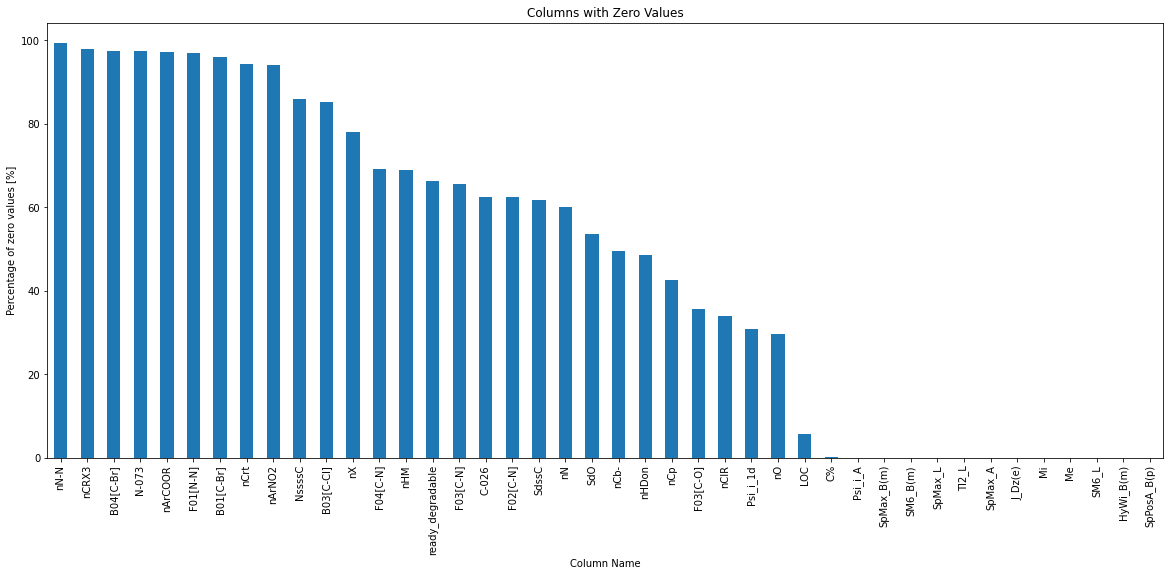

In [11]:
#check data for zero values
zeros = [round(sum(biodeg.iloc[:,i] == 0)/len(biodeg),3)*100 for i in range(biodeg.shape[1])]
zero = pd.DataFrame(zeros , index = biodeg.columns).sort_values(by=0, ascending = False)

#plot results
zero.plot(kind = 'bar', legend = False, figsize =(20,8))
plt.title('Columns with Zero Values')
plt.ylabel('Percentage of zero values [%]')
plt.xlabel('Column Name')

<p style = "font-family: Times New Roman">While zero values in a lot of columns are quite common, it does not provide any evidence of missing data. Since the actual molecule names or structures are not provided, zero values will be kept.</p>

<p style = "font-family: Times New Roman">Class inbalance will lead to a bias towards the majority class, if the imbalance is too high. Therefore the distribution of our target class will also be investigate.</p>

In [12]:
biodeg["ready_degradable"].value_counts(normalize = True)

0    0.662559
1    0.337441
Name: ready_degradable, dtype: float64

<p style = "font-family: Times New Roman">We can see almost 2/3 of them are non-ready degradable while the rest of 1/3 of them are ready degradable. This implies that the class is actually not perfectly balance. But we consider this imbalance is not too high and therefore we decided to keep the inbalance since upscaling would lead to duplicates and downscaling to a loss of data.</p>

## 4) Features Scaling
<p style = "font-family: Times New Roman">We will perform standardization to avoid bias of a certain feature when we test different of models especially distance-based classifiers such as KNN, Perceptron, Logistic regression and SVM.</p>

In [13]:
from sklearn.preprocessing import StandardScaler
y = biodeg['ready_degradable']
X_features = biodeg.drop(columns='ready_degradable')
scaler = StandardScaler()
X_transform = scaler.fit_transform(X_features)
X_transform_pd = pd.DataFrame(X_transform, columns = X_features.columns)
X_transform_pd.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
0,-1.579865,-0.455652,-0.490223,-0.16669,-0.420308,-0.270248,-0.740386,-0.618770,0.317793,-1.016454,-0.461291,0.256245,-0.635144,1.526208,-1.007696,-0.814866,-1.146971,0.361577,-0.083838,-0.232991,-0.134854,-0.391278,-0.293691,-0.20362,-0.416565,-0.15683,-1.254914,0.076836,-0.165118,-0.738463,0.868794,-0.20172,-0.581289,-0.560901,-0.764983,-0.970085,-1.505801,-0.629667,-1.108824,-0.160545,-0.323123
1,-1.120710,-1.149466,-0.490223,-0.16669,-0.420308,-0.270248,-0.740386,-0.684415,-0.191738,-0.452944,-0.461291,0.256245,-1.739836,0.053811,-1.308266,-0.590405,-0.522943,0.427959,-0.083838,-0.232991,-0.134854,-1.397294,-0.084761,-0.20362,-0.416565,-0.15683,-0.007259,-1.276615,-0.165118,-0.738463,-0.537477,-0.20172,-0.581289,-0.560901,-0.764983,-0.603766,-0.920550,-0.629667,-1.105602,-0.160545,-0.323123
2,-1.556084,0.218665,-0.490223,-0.16669,-0.420308,-0.270248,-0.740386,-1.132986,0.317793,1.237584,-0.461291,0.256245,-0.338847,1.570749,-0.891346,-0.814866,-0.092579,0.693487,-0.083838,-0.232991,-0.134854,-1.521749,-0.293691,-0.20362,-0.416565,-0.15683,-1.210671,-0.042771,-0.165118,-0.738463,1.060623,-0.20172,-0.581289,-0.560901,0.030931,-0.842975,-0.220118,-0.629667,-0.828495,-0.160545,-0.323123
3,-3.260993,-0.432906,-0.490223,-0.16669,-0.420308,-0.270248,-0.740386,-1.866017,-0.701269,0.110565,-0.461291,0.256245,-2.358121,-0.550673,-3.601860,-0.814866,2.037723,1.191352,-0.083838,-0.232991,-0.134854,-2.226997,-0.293691,-0.20362,-0.416565,-0.15683,-3.546706,6.762259,-0.165118,-0.035282,-0.637209,-0.20172,-0.581289,-0.560901,0.030931,-0.873001,3.800364,-0.629667,-1.562345,-0.160545,-0.323123
4,-0.999976,0.391006,-0.490223,-0.16669,-0.420308,-0.270248,-0.740386,-0.837585,0.317793,1.237584,-0.461291,-0.096024,-0.047688,1.784545,-0.441031,-0.365945,-0.200170,0.527532,-0.083838,-0.232991,-0.134854,-1.055041,-0.293691,-0.20362,-0.416565,-0.15683,-1.020426,-0.005000,-0.165118,0.131830,1.393223,-0.20172,-0.581289,-0.560901,-0.764983,-0.567735,-0.238796,-0.629667,-0.504667,-0.160545,-0.323123


## 5) Features Selection
<span style = "font-family: Times New Roman">
    <div style = "text-align: justify">Since wrapper method is more proned to overfitting and it requires more computation time than the filter method, and we have 41 features which is quite a lot of them, so we decide to use the filter method which is SelectKBest to choose our best k number of features. Moreover, feature selection was meant to reduce the computational time. If we choose the longer computational time of wrapper method, then feature selection will lose its purpose. Regarding the value of k, if we select a value that is too high, then the reduction of computational time is negligible. But if we select a value that is too low, then it will affect the accuracy of the model to predict our target class. We assumes that taking 75% of the original number of features provided by the dataset as our k value is the optimal value for the SelectKBest filter method. Therefore, we will choose about 75% of all the features which is roughly equals to 30 features. Since all of the features are numerical and the target class is categorical, ANOVA is chosen to compute the ANOVA F-value for the provided sample. In scikit-learn, the method is called f_classif instead of ANOVA.</div>
</span>

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif
kBest = SelectKBest(f_classif, k = 30)
X_kBestFeatures = kBest.fit_transform(X_transform, y)
X_kBestFeatures.shape

(1055, 30)

<p style = "font-family: Times New Roman">Just for curiosity reason, we would like to see what features have actually selected in terms of their index position and also their name.</p>

In [15]:
kBest.get_support(True)

array([ 0,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 17, 19, 21, 22,
       23, 24, 26, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40], dtype=int64)

In [16]:
X_kBestFeatures = X_transform_pd.iloc[:, kBest.get_support(True)]
X_kBestFeatures.columns

Index(['SpMax_L', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-', 'C%', 'nO',
       'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L', 'Mi', 'nArNO2',
       'SpPosA_B(p)', 'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'SpMax_A', 'TI2_L',
       'nCrt', 'C-026', 'F02[C-N]', 'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)',
       'nArCOOR', 'nX'],
      dtype='object')

In [17]:
X_kBestFeatures.head()

,SpMax_L,nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,Mi,nArNO2,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],SpMax_A,TI2_L,nCrt,C-026,F02[C-N],SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
0,-1.579865,-0.490223,-0.16669,-0.420308,-0.270248,-0.740386,-0.618770,-1.016454,-0.461291,0.256245,-0.635144,1.526208,-1.007696,0.361577,-0.232991,-0.391278,-0.293691,-0.20362,-0.416565,-1.254914,0.868794,-0.20172,-0.581289,-0.560901,-0.970085,-1.505801,-0.629667,-1.108824,-0.160545,-0.323123
1,-1.120710,-0.490223,-0.16669,-0.420308,-0.270248,-0.740386,-0.684415,-0.452944,-0.461291,0.256245,-1.739836,0.053811,-1.308266,0.427959,-0.232991,-1.397294,-0.084761,-0.20362,-0.416565,-0.007259,-0.537477,-0.20172,-0.581289,-0.560901,-0.603766,-0.920550,-0.629667,-1.105602,-0.160545,-0.323123
2,-1.556084,-0.490223,-0.16669,-0.420308,-0.270248,-0.740386,-1.132986,1.237584,-0.461291,0.256245,-0.338847,1.570749,-0.891346,0.693487,-0.232991,-1.521749,-0.293691,-0.20362,-0.416565,-1.210671,1.060623,-0.20172,-0.581289,-0.560901,-0.842975,-0.220118,-0.629667,-0.828495,-0.160545,-0.323123
3,-3.260993,-0.490223,-0.16669,-0.420308,-0.270248,-0.740386,-1.866017,0.110565,-0.461291,0.256245,-2.358121,-0.550673,-3.601860,1.191352,-0.232991,-2.226997,-0.293691,-0.20362,-0.416565,-3.546706,-0.637209,-0.20172,-0.581289,-0.560901,-0.873001,3.800364,-0.629667,-1.562345,-0.160545,-0.323123
4,-0.999976,-0.490223,-0.16669,-0.420308,-0.270248,-0.740386,-0.837585,1.237584,-0.461291,-0.096024,-0.047688,1.784545,-0.441031,0.527532,-0.232991,-1.055041,-0.293691,-0.20362,-0.416565,-1.020426,1.393223,-0.20172,-0.581289,-0.560901,-0.567735,-0.238796,-0.629667,-0.504667,-0.160545,-0.323123


## 6) Preparation of Training Set and Test Set
<p style = "font-family: Times New Roman">We split the dataset into training set and test set. For the spilting ratio, what I normally do is see the size of the dataset. If the dataset is relatively small (n < 10000), 70:30 would be a suitable choice. If the dataset is relatively large, say n > 10000, then choose 80:20. In this case, we have 1055 instances, so we choose to split the dataset into 70% for training and 30% for testing.</p>

In [18]:
from sklearn.model_selection import train_test_split
seed_num = 10

X_train, X_test, y_train, y_test = train_test_split(X_kBestFeatures, y, test_size=0.3, random_state=seed_num)

print(X_train.shape)
print(X_test.shape)

(738, 30)
(317, 30)


## 7) Basic Model Building(Baseline Validation Performance)

Before going further, I like to see how various different models perform with default parameters. In this project, 14 different ML models/classifiers was built:
1. k-Nearest Neighbors
2. Perceptron
3. Logistic Regression
4. Decision Tree
5. Support Vector Classifier
6. Gaussian Naive Bayes
7. Random Forest
8. Ridge Classifier
9. PassiveAggressiveClassifier
10. Multi-layer Perceptron Classifier
11. Gradient Boosting Classifier
12. AdaBoostClassifier
13. BaggingClassifier
14. Ensemble Voting Classifier

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [20]:
knn = KNeighborsClassifier(n_jobs=-1)
pcpt = Perceptron(random_state=seed_num, n_jobs=-1)
lr = LogisticRegression(random_state=seed_num, n_jobs=-1)
dt = DecisionTreeClassifier(random_state = seed_num)
svc = SVC(probability=True, random_state=seed_num)
gnb = GaussianNB()
rf = RandomForestClassifier(random_state = seed_num, n_jobs=-1)
rid = RidgeClassifier(random_state=seed_num)
pac = PassiveAggressiveClassifier(random_state=seed_num, n_jobs=-1)
mlp = MLPClassifier(random_state=seed_num)
gbc = GradientBoostingClassifier(random_state=seed_num)
ada = AdaBoostClassifier(random_state=seed_num)
bag = BaggingClassifier(random_state=seed_num, n_jobs=-1)

In [21]:
from sklearn.ensemble import VotingClassifier
vot = VotingClassifier(estimators = [('knn',knn),('pcpt',pcpt),('lr',lr),('dt',dt),('svc',svc),('gnb',gnb),('rf',rf),('rid',rid),('pac',pac),('mlp',mlp),('gbc',gbc),('ada',ada),('bag',bag)], n_jobs=-1)

<span style = "font-family: Times New Roman">
    <div style = "text-align: justify">Because of the slight imbalance of target class, we cannot solely depend on accuracy as our performance metrics. Therefore we must also consider not only accuracy, but also precision, recall and F1 score as our performance metric of the classifiers. We are also going to create our custom performance metric called average which will take the mean of all metrics(accuracy, precision, recall and F1 score). Then, we will choose the best model by taking the model which scored with the highest average. This is because we want our best model not only with high accuracy, but also with high precision, high recall and high F1 score as well, to ensure that the target class not only is well predicted but also can be highly trustable at the same time.</div>
</span>

In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def fit_and_get_performance(algo, X_train, y_train, X_test, y_test):
    
    model = algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # this is a custom metric which take the average of all the performance metric
    average = (accuracy + precision + recall + f1)/4 
    
    row = [accuracy, precision, recall, f1, average]
    return row

In [23]:
# Initialize the data frame for stroring the performance of all models later on
column_names = ['Models', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'Average']
basic_models_scores = pd.DataFrame(columns = column_names)
tuned_models_scores = pd.DataFrame(columns = column_names)

In [24]:
model = [knn, pcpt, lr, dt, svc, gnb, rf, rid, pac, mlp, gbc, ada, bag, vot]
model_name = ['k-Nearest Neighbors',
              'Perceptron',
              'Logistic Regression', 
              'Decision Tree', 
              'Support Vector Classifier', 
              'Gaussian Naive Bayes', 
              'Random Forest', 
              'Ridge Classifier',
              'Passive Aggressive Classifier',
              'Multi-layer Perceptron Classifier',
              'Gradient Boosting Classifier',
              'AdaBoost Classifier',
              'Bagging Classifier',
              'Voting Classifier'
             ]

i=0
for m in model:
    scores = fit_and_get_performance(m, X_train, y_train, X_test, y_test)
    row = [model_name[i]] + scores
    basic_models_scores.loc[i+1] = row
    i+=1

In [25]:
basic_models_scores.sort_values(by='Average', ascending=False)

,Models,Accuracy,Precision,Recall,F1 score,Average
14,Voting Classifier,0.895899,0.891304,0.780952,0.832487,0.850161
10,Multi-layer Perceptron Classifier,0.892744,0.873684,0.790476,0.830000,0.846726
3,Logistic Regression,0.876972,0.843750,0.771429,0.805970,0.824530
5,Support Vector Classifier,0.870662,0.855556,0.733333,0.789744,0.812324
13,Bagging Classifier,0.867508,0.846154,0.733333,0.785714,0.808177
9,Passive Aggressive Classifier,0.858044,0.788462,0.780952,0.784689,0.803037
11,Gradient Boosting Classifier,0.864353,0.852273,0.714286,0.777202,0.802028
12,AdaBoost Classifier,0.861199,0.842697,0.714286,0.773196,0.797844
8,Ridge Classifier,0.854890,0.810526,0.733333,0.770000,0.792187
1,k-Nearest Neighbors,0.851735,0.790000,0.752381,0.770732,0.791212


## 7) Models tuning

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### k-Nearest Neighbors

In [27]:
param_grid = {'n_neighbors' : np.arange(1,20,2),
              'p' : [1,2],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_knn = clf_knn.fit(X_train, y_train)
best_knn = best_clf_knn.best_estimator_
best_clf_knn.best_params_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    5.7s finished


{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

### Perceptron

In [28]:
param_grid = {'penalty' : [None, 'l1', 'l2', 'elasticnet'],
              'alpha' : [0.0001, 0.00001, 0.001],
              'max_iter' : [1000, 500, 1500],
              'tol': [1e-3, 1e-4, 1e-2],
              'eta0': [1, 5, 0.1],
              'early_stopping': [False, True],
              'class_weight': [None, 'balanced'],
              'warm_start': [False, True]
             }
clf_pcpt = GridSearchCV(pcpt, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_pcpt = clf_pcpt.fit(X_train, y_train)
best_pcpt = best_clf_pcpt.best_estimator_
best_clf_pcpt.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 6160 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 11760 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 12960 out of 12960 | elapsed:   38.4s finished


{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': True,
 'eta0': 5,
 'max_iter': 1000,
 'penalty': 'l2',
 'tol': 0.001,
 'warm_start': False}

### Logistic Regression

In [29]:
param_grid = {'penalty' : ['l2', 'l1', 'elasticnet'],
              'tol': [1e-4, 1e-5, 1e-3],
              'C' : [1, 0.1, 5],
              'max_iter' : [100, 50, 200],
              'class_weight': [None, 'balanced'],
              'solver': ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
              'multi_class': ['auto', 'ovr', 'multinomial']
             }

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_lr = clf_lr.fit(X_train, y_train)
best_lr = best_clf_lr.best_estimator_
best_clf_lr.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 2430 candidates, totalling 12150 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1872 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 3974 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 6736 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 10292 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 12150 out of 12150 | elapsed:  1.2min finished


{'C': 5,
 'class_weight': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.001}

### Decision Tree

In [30]:
param_grid =  {'criterion':['gini','entropy'],
               'splitter': ['best', 'random'],
               'max_depth': np.arange(3,8,1),
               'min_samples_leaf': np.arange(1,5,1),
               'min_samples_split': np.arange(3,8,1),
               'max_features': [None, 'auto', 'sqrt', 'log2'],
               'class_weight': [None, 'balanced']
              }
                                  
clf_dt = GridSearchCV(dt, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_dt = clf_dt.fit(X_train, y_train)
best_dt = best_clf_dt.best_estimator_
best_clf_dt.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 3200 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 9600 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 14000 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:   40.7s finished


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

### Support Vector Machine(Support Vector Classsifier)

In [31]:
param_grid =  {'C': [0.1, 1, 5],
               'kernel': ['rbf','linear','poly','sigmoid'],  
               'degree': [3, 2, 4], 
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False],
               'tol': [1e-3, 1e-4, 1e-2],
              }
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_svc = clf_svc.fit(X_train, y_train)
best_svc = best_clf_svc.best_estimator_
best_clf_svc.best_params_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 2145 out of 2160 | elapsed:   47.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   48.7s finished


{'C': 5,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'shrinking': True,
 'tol': 0.01}

### Gaussian Naive Bayes

In [32]:
param_grid =  {'var_smoothing': np.logspace(-1,-10, num=100)}
clf_gnb = GridSearchCV(gnb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_gnb = clf_gnb.fit(X_train, y_train)
best_gnb = best_clf_gnb.best_estimator_
best_clf_gnb.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished


{'var_smoothing': 0.003511191734215131}

### Random Forest

<p style = "font-family: Times New Roman">Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model. I took the best model from this and did a more granular search.</p>

In [33]:
from sklearn.model_selection import RandomizedSearchCV

param_grid =  {'n_estimators': [100, 500, 1000], 
               'max_depth': [5, 10, 20, None],
               'max_features': ['auto','sqrt','log2'],
               'min_samples_leaf': [1, 5, 9],
               'min_samples_split': [2, 5, 10]
              }
                                  
clf_rf_rand = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1, random_state = seed_num)
best_clf_rf_rand = clf_rf_rand.fit(X_train, y_train)
best_clf_rf_rand.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.1min finished


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [34]:
param_grid =  {
               'n_estimators': [1000], 
               'max_depth': [None],
               'max_features': ['auto'],
               'min_samples_leaf': [1,2],
               'min_samples_split': [1,2,3],
               'criterion':['gini','entropy'],
              }
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_rf = clf_rf.fit(X_train, y_train)
best_rf = best_clf_rf.best_estimator_
best_clf_rf.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   36.2s finished


{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

### Ridge Classifier

In [35]:
param_grid =  {
               'alpha': [1, 0.1, 5],
               'tol': [1e-3, 1e-4, 1e-2],
               'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
               'class_weight': [None, 'balanced'],
               'max_iter': [None, 100, 200, 500, 1000],
               'fit_intercept': [True, False],
              }
                                  
clf_rid = GridSearchCV(rid, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_rid = clf_rid.fit(X_train, y_train)
best_rid = best_clf_rid.best_estimator_
best_clf_rid.best_params_

Fitting 5 folds for each of 1260 candidates, totalling 6300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 6300 out of 6300 | elapsed:   44.0s finished


{'alpha': 0.1,
 'class_weight': None,
 'fit_intercept': True,
 'max_iter': None,
 'solver': 'sparse_cg',
 'tol': 0.01}

### Passive Aggressive Classifier

In [36]:
param_grid =  {
               'C': [1, 0.1, 5],
               'max_iter': [1000, 500, 1500, None],
               'tol': [1e-3, 1e-4, 1e-2],
               'class_weight': [None, 'balanced'],
               'fit_intercept': [True, False],
               'average': [True, False],
               'early_stopping': [False, True]
              }
                                  
clf_pac = GridSearchCV(pac, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_pac = clf_pac.fit(X_train, y_train)
best_pac = best_clf_pac.best_estimator_
best_clf_pac.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:    7.3s finished


{'C': 0.1,
 'average': True,
 'class_weight': None,
 'early_stopping': False,
 'fit_intercept': True,
 'max_iter': 1000,
 'tol': 0.001}

### Multi-layer Perceptron Classifier

In [37]:
param_grid =  {
               'hidden_layer_sizes': [100, 50, 150],
               'alpha': [0.0001, 0.001, 0.00001],
               'tol': [1e-4, 1e-3, 1e-5],
               'batch_size': [256, 128],
              }
                                  
clf_mlp = GridSearchCV(mlp, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_mlp = clf_mlp.fit(X_train, y_train)
best_mlp = best_clf_mlp.best_estimator_
best_clf_mlp.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   58.6s finished


{'alpha': 0.0001, 'batch_size': 128, 'hidden_layer_sizes': 150, 'tol': 0.0001}

### Gradient Boosting Classifier

In [38]:
param_grid =  {
                'learning_rate': [0.1, 1, 0.01],
                'n_estimators': [100, 50, 200],
                'min_samples_split': [2,5,10],
                'min_samples_leaf': [1,5,9],
                'max_depth': [3,1,5],
                'tol': [1e-4, 1e-3, 1e-5],
                'max_features': [None, 'auto', 'sqrt', 'log2']
              }
                                  
clf_gbc_rand = RandomizedSearchCV(gbc, param_distributions = param_grid, n_iter = 200, cv = 5, verbose = True, n_jobs = -1, random_state = seed_num)
best_clf_gbc = clf_gbc_rand.fit(X_train, y_train)
best_gbc = best_clf_gbc.best_estimator_
best_clf_gbc.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   49.0s finished


{'tol': 0.001,
 'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 5,
 'learning_rate': 0.1}

In [39]:
param_grid =  {
               'learning_rate': [0.1, 0.5, 0.05],
                'n_estimators': [50],
                'min_samples_split': [3,5,7],
                'min_samples_leaf': [3,5,7],
                'max_depth': [5],
                'tol': [1e-3, 5e-3, 5e-4],
                'max_features': ['sqrt']
              }
                                  
clf_gbc = GridSearchCV(gbc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_gbc = clf_gbc.fit(X_train, y_train)
best_clf_gbc.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    9.5s finished


{'learning_rate': 0.5,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 50,
 'tol': 0.001}

### Ada Boost Classifier

In [40]:
param_grid =  {
               'base_estimator': [best_dt, best_lr, best_svc, best_gnb],
               'n_estimators': [50, 100, 150],
               'learning_rate':[1, 0.1, 0.01],
              }
                                  
clf_ada = GridSearchCV(ada, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_ada = clf_ada.fit(X_train, y_train)
best_ada = best_clf_ada.best_estimator_
best_clf_ada.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.2min finished


{'base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                        min_samples_split=3, random_state=10),
 'learning_rate': 1,
 'n_estimators': 50}

### BaggingClassifier

In [41]:
param_grid =  {
               'base_estimator': [best_dt, best_knn, best_pcpt, best_lr, best_svc, best_gnb],
               'n_estimators':[10, 5, 15],
               'bootstrap': [True,False],
               'bootstrap_features': [False,True],
               'oob_score': [False,True],
               'warm_start': [False,True]
              }

clf_bag = GridSearchCV(bag, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_bag = clf_bag.fit(X_train, y_train)
best_bag = best_clf_bag.best_estimator_
best_clf_bag.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 980 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   38.5s finished


{'base_estimator': KNeighborsClassifier(n_jobs=-1, p=1, weights='distance'),
 'bootstrap': False,
 'bootstrap_features': False,
 'n_estimators': 10,
 'oob_score': False,
 'warm_start': False}

### Voting Classifier

In [42]:
tuned_model = [best_knn, best_pcpt, best_lr, best_dt, best_svc, best_gnb, best_rf, best_rid, best_pac, best_mlp, best_gbc, best_ada, best_bag]
model_name = ['k-Nearest Neighbors',
              'Perceptron',
              'Logistic Regression', 
              'Decision Tree', 
              'Support Vector Classifier', 
              'Gaussian Naive Bayes', 
              'Random Forest', 
              'Ridge Classifier',
              'Passive Aggressive Classifier',
              'Multi-layer Perceptron Classifier',
              'Gradient Boosting Classifier',
              'AdaBoost Classifier',
              'Bagging Classifier',
              'Voting Classifier'
             ]

i=0
for m in tuned_model:
    scores = fit_and_get_performance(m, X_train, y_train, X_test, y_test)
    row = [model_name[i]] + scores
    tuned_models_scores.loc[i+1] = row
    i+=1

In [43]:
tuned_models_scores.sort_values(by='Average', ascending=False)

,Models,Accuracy,Precision,Recall,F1 score,Average
10,Multi-layer Perceptron Classifier,0.895899,0.882979,0.790476,0.834171,0.850881
5,Support Vector Classifier,0.889590,0.872340,0.780952,0.824121,0.841751
9,Passive Aggressive Classifier,0.876972,0.836735,0.780952,0.807882,0.825635
3,Logistic Regression,0.873817,0.815534,0.800000,0.807692,0.824261
12,AdaBoost Classifier,0.851735,0.790000,0.752381,0.770732,0.791212
1,k-Nearest Neighbors,0.845426,0.754545,0.790476,0.772093,0.790635
13,Bagging Classifier,0.845426,0.754545,0.790476,0.772093,0.790635
8,Ridge Classifier,0.851735,0.802083,0.733333,0.766169,0.788330
7,Random Forest,0.854890,0.839080,0.695238,0.760417,0.787406
11,Gradient Boosting Classifier,0.851735,0.829545,0.695238,0.756477,0.783249


In [44]:
vot = VotingClassifier(estimators = [('mlp',best_mlp),('svc',best_svc),('pac',best_pac),('lr',best_lr),('ada',best_ada),('knn',best_knn),('bag',best_bag),('rid',best_rid),('rf',best_rf),('gbc',gbc),('gnb',best_gnb),('dt',best_dt),('pcpt',best_pcpt)], n_jobs=-1)
params = {'weights' : [ [1,1,1,0,0,0,0,0,0,0,0,0,0],
                        [1,1,1,1,1,0,0,0,0,0,0,0,0],
                        [1,1,1,1,1,1,1,0,0,0,0,0,0],
                        [1,1,1,1,1,1,1,1,1,0,0,0,0],
                        [1,1,1,1,1,1,1,1,1,1,1,0,0],
                        [1,1,1,1,1,1,1,1,1,1,1,1,1] 
                      ]
          }

clf_vot = GridSearchCV(vot, param_grid = params, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_vot = clf_vot.fit(X_train, y_train)
best_clf_vot.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   43.9s finished


{'weights': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]}

In [57]:
vot = VotingClassifier(estimators = [('mlp',best_mlp),('svc',best_svc),('pac',best_pac),('lr',best_lr),('ada',best_ada),('knn',best_knn),('bag',best_bag)], n_jobs=-1)
params = {'weights' : [ [1,1,1,1,1,1,1], 
                        [1.5,1,1,1,1,1,1],
                        [1.5,1.5,1,1,1,1,1],
                        [1.5,1.5,1.5,1,1,1,1],
                        [1.5,1.5,1.5,1.5,1,1,1],
                        [1.5,1.5,1.5,1.5,1.5,1,1],
                        [1.5,1.5,1.5,1.5,1.5,1.5,1]
                      ]
          }

clf_vot = GridSearchCV(vot, param_grid = params, cv = 5, verbose = True, n_jobs = -1, scoring =['accuracy','precision','recall','f1'], refit='f1')
best_clf_vot = clf_vot.fit(X_train, y_train)
best_vot = best_clf_vot.best_estimator_
best_clf_vot.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   16.8s finished


{'weights': [1.5, 1.5, 1, 1, 1, 1, 1]}

In [58]:
scores = fit_and_get_performance(best_vot, X_train, y_train, X_test, y_test)
row = [model_name[13]] + scores
tuned_models_scores.loc[14] = row

## 8) Best model selection

<p style = "font-family: Times New Roman">Here, we can visualize the performance of all models at once. The score will be sorted by Average score so that we can compare their performance for which model perform the best with highest overall score.</p>

In [59]:
tuned_models_scores.sort_values(by='Average', ascending=False)

,Models,Accuracy,Precision,Recall,F1 score,Average
10,Multi-layer Perceptron Classifier,0.895899,0.882979,0.790476,0.834171,0.850881
5,Support Vector Classifier,0.889590,0.872340,0.780952,0.824121,0.841751
14,Voting Classifier,0.886435,0.870968,0.771429,0.818182,0.836753
9,Passive Aggressive Classifier,0.876972,0.836735,0.780952,0.807882,0.825635
3,Logistic Regression,0.873817,0.815534,0.800000,0.807692,0.824261
12,AdaBoost Classifier,0.851735,0.790000,0.752381,0.770732,0.791212
1,k-Nearest Neighbors,0.845426,0.754545,0.790476,0.772093,0.790635
13,Bagging Classifier,0.845426,0.754545,0.790476,0.772093,0.790635
8,Ridge Classifier,0.851735,0.802083,0.733333,0.766169,0.788330
7,Random Forest,0.854890,0.839080,0.695238,0.760417,0.787406


<p style = "font-family: Times New Roman">As we can see, the best model that performs the best on the validation set is actually Multi-layer Perceptron Classifier since it scored the highest average of the performance metrics with value about 0.85 scoring. Below, we can visualize the model performances by plotting a bar graph for the performance metrics of all models while plotting a line graph for average scoring in the same x and y-axis.</p>

Text(0.5, 1.0, 'Model Performances')

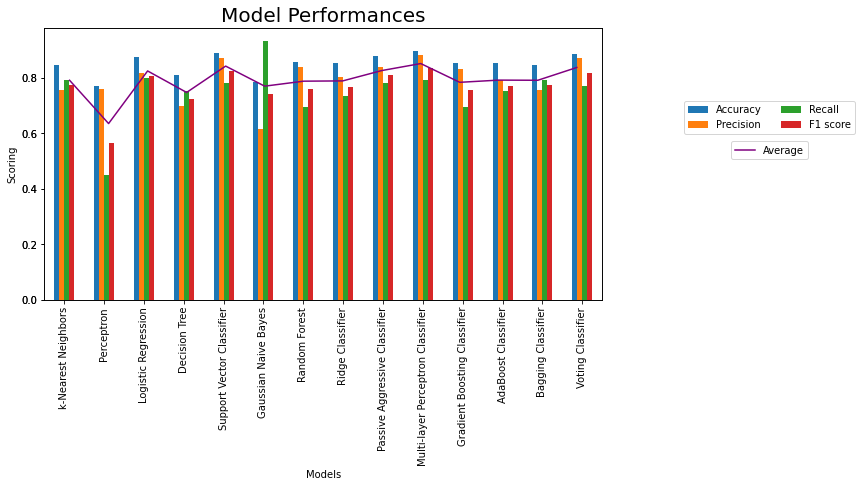

In [61]:
# Seperate into two data frame (performance_metric and average_performance) 
tuned_models_scores.index = tuned_models_scores['Models']
performance_metric = tuned_models_scores
average_performance = tuned_models_scores['Average']
performance_metric = performance_metric.drop(columns = 'Average')

# Bar plot the performance_metric
ax1 = performance_metric.plot.bar()
plt.legend(loc="upper center", bbox_to_anchor=(1.3, 0.75), ncol=2)

# Line plot the average_performance in the same figure
ax2 = ax1.twiny()
ax2 = average_performance.plot.line(figsize=(10,5),color='purple')
plt.xticks([])
plt.xlabel('')

# Adjustment of the plotting
plt.xticks(rotation=90)
plt.legend(loc="upper center", bbox_to_anchor=(1.3, 0.60), ncol=2)
plt.ylabel("Scoring")
plt.title("Model Performances", fontdict = {"fontsize": 20} )

<p style = "font-family: Times New Roman">We will select Voting Classifier as our best models for this dataset.</p>

In [62]:
best_model = best_mlp

## 9) Results/Performance of the best Models

<p style = "font-family: Times New Roman">Finally, we will double-check the best model's performance using the test set.</p>

In [63]:
tuned_models_scores.index = basic_models_scores.index
tuned_models_scores.iloc[[10-1]]

,Models,Accuracy,Precision,Recall,F1 score,Average
10,Multi-layer Perceptron Classifier,0.895899,0.882979,0.790476,0.834171,0.850881


              precision    recall  f1-score   support

           0       0.90      0.95      0.92       212
           1       0.88      0.79      0.83       105

    accuracy                           0.90       317
   macro avg       0.89      0.87      0.88       317
weighted avg       0.90      0.90      0.89       317



<AxesSubplot:>

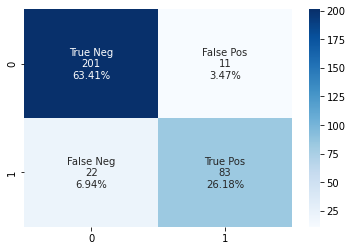

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='')

<p style = "font-family: Times New Roman">Great! The performance metrics against the test set are almost as high as the validation set. The value of accuracy, precision, recall and F1 score does not change significantly. This implies that the model is consistant while being accurate at the same time. Also, this means that the model does not suffer from overfitting or underfitting problem.</p>

## 10) Feature Importance

<p style = "font-family: Times New Roman">In this section, we will try to see which feature is the most important for Decision Tree model as well as Random Forest model.</p>

In [65]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(best_dt.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
SpMax_B(m),0.282
SpMax_L,0.130
F02[C-N],0.094
SpPosA_B(p),0.069
Psi_i_A,0.051
nN,0.039
SdssC,0.037
TI2_L,0.035
HyWi_B(m),0.035


<AxesSubplot:xlabel='feature'>

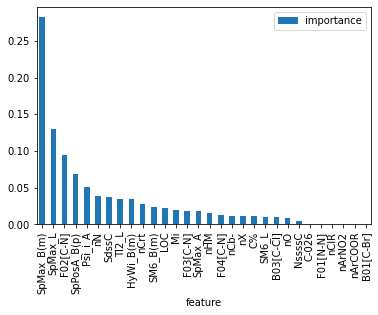

In [66]:
importances.plot.bar()

In [67]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(best_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
SpMax_B(m),0.093
SpMax_L,0.079
SpPosA_B(p),0.076
SM6_B(m),0.072
SpMax_A,0.057
Psi_i_A,0.052
Mi,0.045
SM6_L,0.044
SdssC,0.044


<AxesSubplot:xlabel='feature'>

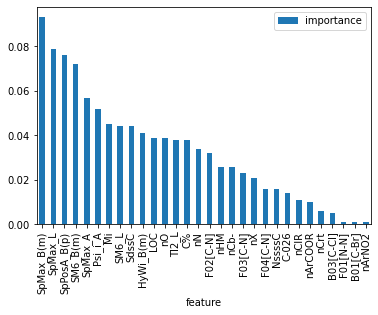

In [68]:
importances.plot.bar()

## 11) Model Saving

<p style = "font-family: Times New Roman">In this section, we will save the best model to disk.</p>

In [69]:
import pickle
pickle.dump(best_model, open('best_model.pkl','wb'))